In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
messages_df = pd.read_csv('disaster_messages.csv')
categories_df = pd.read_csv('disaster_categories.csv')

print("=== Messages Dataset Shape ===")
print(f"Messages: {messages_df.shape}")

print("\n=== Categories Dataset Shape ===")
print(f"Categories: {categories_df.shape}")

print("\n=== First 3 rows of Messages ===")
print(messages_df.head(3))

print("\n=== First 3 rows of Categories ===")
print(categories_df.head(3))

=== Messages Dataset Shape ===
Messages: (26248, 4)

=== Categories Dataset Shape ===
Categories: (26248, 2)

=== First 3 rows of Messages ===
   id                                            message  \
0   2  Weather update - a cold front from Cuba that c...   
1   7            Is the Hurricane over or is it not over   
2   8                    Looking for someone but no name   

                                            original   genre  
0  Un front froid se retrouve sur Cuba ce matin. ...  direct  
1                 Cyclone nan fini osinon li pa fini  direct  
2  Patnm, di Maryani relem pou li banm nouvel li ...  direct  

=== First 3 rows of Categories ===
   id                                         categories
0   2  related-1;request-0;offer-0;aid_related-0;medi...
1   7  related-1;request-0;offer-0;aid_related-1;medi...
2   8  related-1;request-0;offer-0;aid_related-0;medi...


In [2]:
# Let's examine the structure of categories more carefully
print("Sample category string:")
print(categories_df['categories'].iloc[0])

# Split the categories into separate columns - FIXED VERSION
def parse_categories(categories_str):
    """Parse the categories string into a dictionary"""
    categories_dict = {}
    # Split by semicolon
    items = categories_str.split(';')
    for item in items:
        if '-' in item:
            parts = item.split('-')
            # Join all parts except the last one as key, last part as value
            key = '-'.join(parts[:-1])
            value = parts[-1]
            categories_dict[key] = int(value)
    return categories_dict

# Apply the parsing function
categories_parsed = categories_df['categories'].apply(parse_categories)

# Convert to DataFrame
categories_expanded = pd.DataFrame(categories_parsed.tolist())

# Add the id column back
categories_expanded['id'] = categories_df['id']

print("\n=== Parsed Categories Columns ===")
print(categories_expanded.columns.tolist())
print(f"Number of categories: {len(categories_expanded.columns) - 1}")  # minus id column

print("\n=== First 3 rows of Parsed Categories ===")
print(categories_expanded.head(3))

print(f"\n=== Expected 36 categories? ===")
print(f"Found {len(categories_expanded.columns) - 1} categories")

Sample category string:
related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0

=== Parsed Categories Columns ===
['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report', 'id']
Number

In [3]:
# Merge messages and categories
df = pd.merge(messages_df, categories_expanded, on='id')

print("=== Merged Dataset Info ===")
print(f"Final dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Check for missing values
print("\n=== Missing Values ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Check for duplicates
print(f"\n=== Duplicate Messages ===")
print(f"Number of duplicate messages: {df['message'].duplicated().sum()}")

# Basic info about the dataset
print("\n=== Dataset Info ===")
print(df.info())

=== Merged Dataset Info ===
Final dataset shape: (26386, 40)
Columns: ['id', 'message', 'original', 'genre', 'related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']

=== Missing Values ===
original    16140
dtype: int64

=== Duplicate Messages ===
Number of duplicate messages: 209

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26386 non-null  int64 
 1   

Number of category columns: 36
First 10 category columns: ['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone']

=== Category Frequency ===
related            20450
aid_related        10954
weather_related     7343
direct_report       5113
request             4513
other_aid           3464
food                2956
storm               2464
earthquake          2461
shelter             2342
dtype: int64


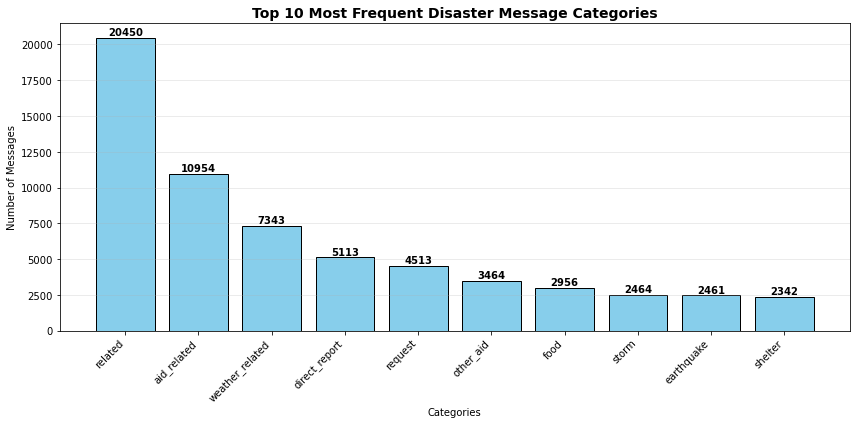

In [4]:
# Get all category columns (excluding id, message, original, genre)
category_columns = [col for col in df.columns if col not in ['id', 'message', 'original', 'genre']]

print(f"Number of category columns: {len(category_columns)}")
print(f"First 10 category columns: {category_columns[:10]}")

# Calculate frequency of each category
category_counts = df[category_columns].sum().sort_values(ascending=False)

print("\n=== Category Frequency ===")
print(category_counts.head(10))  # Show top 10

# Visualize top 10 categories
plt.figure(figsize=(12, 6))
top_10_categories = category_counts.head(10)
bars = plt.bar(range(len(top_10_categories)), top_10_categories.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Disaster Message Categories', fontsize=14, fontweight='bold')
plt.xlabel('Categories')
plt.ylabel('Number of Messages')
plt.xticks(range(len(top_10_categories)), top_10_categories.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_10_categories.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== Multi-label Analysis ===
Average categories per message: 3.18
Maximum categories per message: 27
Minimum categories per message: 0


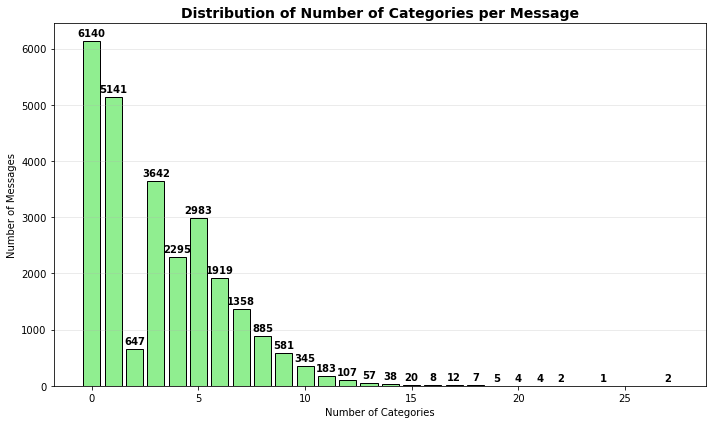


=== Genre Distribution ===
news      13128
direct    10852
social     2406
Name: genre, dtype: int64


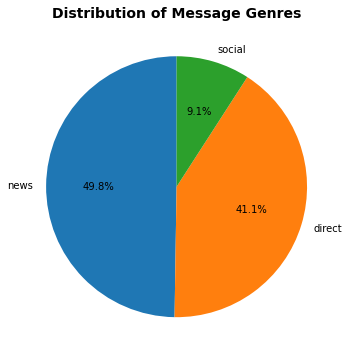

In [5]:
# Count number of categories per message
df['num_categories'] = df[category_columns].sum(axis=1)

print("=== Multi-label Analysis ===")
print(f"Average categories per message: {df['num_categories'].mean():.2f}")
print(f"Maximum categories per message: {df['num_categories'].max()}")
print(f"Minimum categories per message: {df['num_categories'].min()}")

# Distribution of number of categories per message
plt.figure(figsize=(10, 6))
category_count_dist = df['num_categories'].value_counts().sort_index()
plt.bar(category_count_dist.index, category_count_dist.values, color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Categories per Message', fontsize=14, fontweight='bold')
plt.xlabel('Number of Categories')
plt.ylabel('Number of Messages')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (x, y) in enumerate(zip(category_count_dist.index, category_count_dist.values)):
    plt.text(x, y + 50, f'{y}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Genre distribution
print("\n=== Genre Distribution ===")
genre_counts = df['genre'].value_counts()
print(genre_counts)

# Visualize genre distribution
plt.figure(figsize=(8, 6))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Message Genres', fontsize=14, fontweight='bold')
plt.show()

=== Data Imbalance Analysis ===
Most frequent categories:
           category  positive_count  positive_ratio
0           related           20450        0.775032
3       aid_related           10954        0.415144
28  weather_related            7343        0.278292
35    direct_report            5113        0.193777
1           request            4513        0.171038
18        other_aid            3464        0.131282
11             food            2956        0.112029
30            storm            2464        0.093383
32       earthquake            2461        0.093269
12          shelter            2342        0.088759

Least frequent categories:
          category  positive_count  positive_ratio
7         security             471        0.017850
13        clothing             410        0.015539
26     aid_centers             309        0.011711
15  missing_people             301        0.011408
24       hospitals             283        0.010725
31            fire             282  

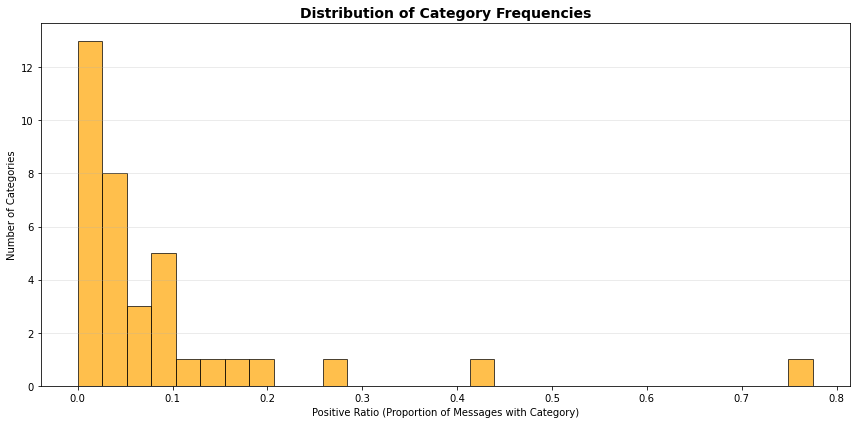


=== Extreme Imbalance Cases ===
Categories with less than 1% frequency: 4
       category  positive_count  positive_ratio
23        tools             159        0.006026
2         offer             121        0.004586
25        shops             120        0.004548
9   child_alone               0        0.000000


In [6]:
# Calculate imbalance ratios
total_messages = len(df)
imbalance_analysis = []

for category in category_columns:
    positive_count = df[category].sum()
    positive_ratio = positive_count / total_messages
    imbalance_analysis.append({
        'category': category,
        'positive_count': positive_count,
        'positive_ratio': positive_ratio,
        'imbalance_ratio': (total_messages - positive_count) / positive_count if positive_count > 0 else float('inf')
    })

imbalance_df = pd.DataFrame(imbalance_analysis).sort_values('positive_ratio', ascending=False)

print("=== Data Imbalance Analysis ===")
print("Most frequent categories:")
print(imbalance_df.head(10)[['category', 'positive_count', 'positive_ratio']])

print("\nLeast frequent categories:")
print(imbalance_df.tail(10)[['category', 'positive_count', 'positive_ratio']])

# Visualize the distribution of category frequencies
plt.figure(figsize=(12, 6))
plt.hist(imbalance_df['positive_ratio'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Category Frequencies', fontsize=14, fontweight='bold')
plt.xlabel('Positive Ratio (Proportion of Messages with Category)')
plt.ylabel('Number of Categories')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show extreme imbalance cases
print("\n=== Extreme Imbalance Cases ===")
high_imbalance = imbalance_df[imbalance_df['positive_ratio'] < 0.01]
print(f"Categories with less than 1% frequency: {len(high_imbalance)}")
print(high_imbalance[['category', 'positive_count', 'positive_ratio']])

In [7]:
# Final summary for Task 1
print("="*80)
print("TASK 1 DELIVERABLES SUMMARY")
print("="*80)

print(f"\n1. DATASET STRUCTURE:")
print(f"   - Total messages: {len(df)}")
print(f"   - Total categories: {len(category_columns)}")
print(f"   - Key columns: message, genre, {len(category_columns)} category labels")
print(f"   - Missing values: {df['original'].isnull().sum()} (only in 'original' column)")
print(f"   - Duplicate messages: {df['message'].duplicated().sum()}")

print(f"\n2. CATEGORY DISTRIBUTION:")
print(f"   - Most frequent category: '{category_counts.index[0]}' with {category_counts.iloc[0]} messages ({category_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"   - Least frequent category: '{category_counts.index[-1]}' with {category_counts.iloc[-1]} messages ({category_counts.iloc[-1]/len(df)*100:.1f}%)")
print(f"   - Average categories per message: {df['num_categories'].mean():.2f}")

print(f"\n3. DATA IMBALANCE OBSERVATIONS:")
rare_categories = len(imbalance_df[imbalance_df['positive_ratio'] < 0.01])
common_categories = len(imbalance_df[imbalance_df['positive_ratio'] > 0.1])
print(f"   - {rare_categories} categories appear in less than 1% of messages")
print(f"   - {common_categories} categories appear in more than 10% of messages")
print(f"   - The top 5 categories cover {imbalance_df.head(5)['positive_ratio'].sum()*100:.1f}% of all label occurrences")

print(f"\n4. GENRE DISTRIBUTION:")
for genre, count in genre_counts.items():
    print(f"   - {genre}: {count} messages ({count/len(df)*100:.1f}%)")

print(f"\n5. MULTI-LABEL CHARACTERISTICS:")
print(f"   - Messages can belong to 1 to {df['num_categories'].max()} categories simultaneously")
print(f"   - Most common number of categories per message: {df['num_categories'].mode().iloc[0]}")

TASK 1 DELIVERABLES SUMMARY

1. DATASET STRUCTURE:
   - Total messages: 26386
   - Total categories: 36
   - Key columns: message, genre, 36 category labels
   - Missing values: 16140 (only in 'original' column)
   - Duplicate messages: 209

2. CATEGORY DISTRIBUTION:
   - Most frequent category: 'related' with 20450 messages (77.5%)
   - Least frequent category: 'child_alone' with 0 messages (0.0%)
   - Average categories per message: 3.18

3. DATA IMBALANCE OBSERVATIONS:
   - 4 categories appear in less than 1% of messages
   - 7 categories appear in more than 10% of messages
   - The top 5 categories cover 183.3% of all label occurrences

4. GENRE DISTRIBUTION:
   - news: 13128 messages (49.8%)
   - direct: 10852 messages (41.1%)
   - social: 2406 messages (9.1%)

5. MULTI-LABEL CHARACTERISTICS:
   - Messages can belong to 1 to 27 categories simultaneously
   - Most common number of categories per message: 0


In [8]:
# TASK 2

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK data
print("Downloading NLTK resources...")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

print("NLTK resources downloaded successfully!")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Comprehensive text cleaning function
    """
    if not isinstance(text, str):
        return ""
    
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Step 3: Remove user mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    
    # Step 4: Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Step 5: Remove punctuation and special characters (keep only letters and basic punctuation)
    text = re.sub(r'[^\w\s\.\?\!]', '', text)
    
    # Step 6: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Step 7: Tokenize
    tokens = word_tokenize(text)
    
    # Step 8: Remove stopwords and apply lemmatization
    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 2:  # Remove short words
            cleaned_tokens.append(lemmatizer.lemmatize(token))
    
    # Step 9: Join back to string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

# Test the cleaning function on a sample message
print("\n=== Testing Cleaning Function ===")
sample_message = df['message'].iloc[0]
print(f"Original message: {sample_message}")
print(f"Cleaned message: {clean_text(sample_message)}")

# Apply cleaning to the entire dataset
print("\n=== Cleaning All Messages ===")
print("This may take a few minutes...")

# Create a new column with cleaned text
df['clean_text'] = df['message'].apply(clean_text)

print("Text cleaning completed!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK resources downloaded successfully!

=== Testing Cleaning Function ===
Original message: Weather update - a cold front from Cuba that could pass over Haiti
Cleaned message: weather update cold front cuba could pas haiti

=== Cleaning All Messages ===
This may take a few minutes...
Text cleaning completed!


In [9]:
# Analyze the cleaning results
print("\n=== Cleaning Results Analysis ===")

# Check empty messages after cleaning
empty_after_cleaning = df[df['clean_text'].str.len() == 0]
print(f"Number of empty messages after cleaning: {len(empty_after_cleaning)}")

# Compare original vs cleaned text length
df['original_length'] = df['message'].apply(lambda x: len(word_tokenize(x) if isinstance(x, str) else 0))
df['cleaned_length'] = df['clean_text'].apply(lambda x: len(word_tokenize(x) if isinstance(x, str) else 0))
df['length_reduction'] = df['original_length'] - df['cleaned_length']

print(f"Average original message length: {df['original_length'].mean():.2f} words")
print(f"Average cleaned message length: {df['cleaned_length'].mean():.2f} words")
print(f"Average length reduction: {df['length_reduction'].mean():.2f} words")

# Show some before/after examples
print("\n=== Before/After Cleaning Examples ===")
sample_indices = [0, 100, 500, 1000, 2000]
for idx in sample_indices:
    print(f"\nExample {idx + 1}:")
    print(f"Original: {df['message'].iloc[idx][:100]}...")
    print(f"Cleaned:  {df['clean_text'].iloc[idx][:100]}...")
    print("-" * 50)


=== Cleaning Results Analysis ===
Number of empty messages after cleaning: 12
Average original message length: 27.01 words
Average cleaned message length: 13.34 words
Average length reduction: 13.68 words

=== Before/After Cleaning Examples ===

Example 1:
Original: Weather update - a cold front from Cuba that could pass over Haiti...
Cleaned:  weather update cold front cuba could pas haiti...
--------------------------------------------------

Example 101:
Original: The message might be saying that they have been stuck in the presidential palace ( pal ) since the s...
Cleaned:  message might saying stuck presidential palace pal since tuesday quake need water message say findin...
--------------------------------------------------

Example 501:
Original: urjent need we are in need of food there are pver 4500 people about 150 families that are without sh...
Cleaned:  urjent need need food pver people family without shelter wounded petion ville near pernier...
--------------------------

In [10]:
# Handle empty messages after cleaning
print("\n=== Handling Empty Messages ===")
print(f"Messages before handling empty ones: {len(df)}")

# Keep only non-empty cleaned messages
df_cleaned = df[df['clean_text'].str.len() > 0].copy()
print(f"Messages after removing empty cleaned text: {len(df_cleaned)}")

# Remove duplicate cleaned messages
print(f"Duplicate cleaned messages before removal: {df_cleaned['clean_text'].duplicated().sum()}")
df_cleaned = df_cleaned.drop_duplicates(subset=['clean_text'])
print(f"Messages after removing duplicates: {len(df_cleaned)}")

# Update our main dataframe
df = df_cleaned.copy()
print(f"Final dataset size after cleaning: {len(df)}")


=== Handling Empty Messages ===
Messages before handling empty ones: 26386
Messages after removing empty cleaned text: 26374
Duplicate cleaned messages before removal: 459
Messages after removing duplicates: 25915
Final dataset size after cleaning: 25915



=== Most Common Words Analysis ===
Top 20 most common words:
people: 2988
water: 2931
food: 2796
help: 2593
need: 2468
please: 1925
earthquake: 1765
area: 1653
like: 1474
would: 1452
said: 1344
country: 1215
also: 1113
know: 1093
government: 1014
one: 988
rain: 967
dont: 958
haiti: 917
find: 912
Word cloud failed: Only supported for TrueType fonts
Continuing with bar chart only...


<Figure size 864x576 with 0 Axes>

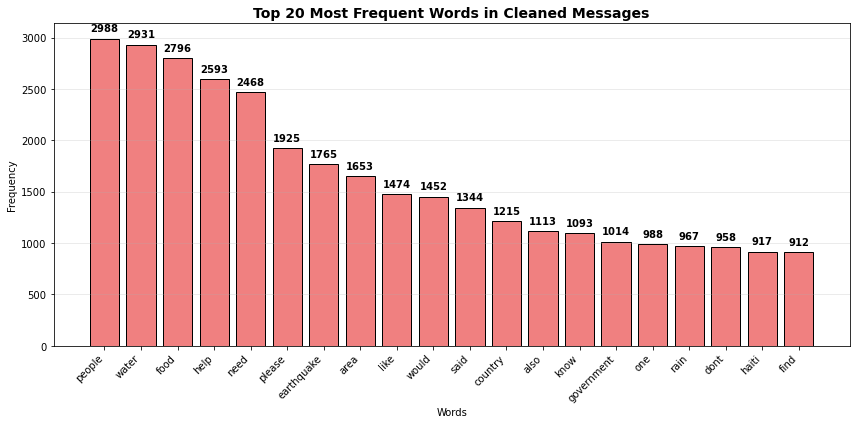

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Analyze most common words in cleaned text
print("\n=== Most Common Words Analysis ===")

# Combine all cleaned text
all_cleaned_text = ' '.join(df['clean_text'].tolist())
words = all_cleaned_text.split()
word_freq = Counter(words)

print("Top 20 most common words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Create word cloud with font specification
try:
    plt.figure(figsize=(12, 8))
    
    # Try using a system font
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100,
        colormap='viridis'
    ).generate(all_cleaned_text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cleaned Disaster Messages', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("Word cloud created successfully!")
    
except Exception as e:
    print(f"Word cloud failed: {e}")
    print("Continuing with bar chart only...")

# Bar chart of top 20 words
plt.figure(figsize=(12, 6))
top_words = word_freq.most_common(20)
words, frequencies = zip(*top_words)
plt.bar(range(len(words)), frequencies, color='lightcoral', edgecolor='black')
plt.title('Top 20 Most Frequent Words in Cleaned Messages', fontsize=14, fontweight='bold')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (word, freq) in enumerate(top_words):
    plt.text(i, freq + 50, f'{freq}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Task 2 Deliverables Summary
print("="*80)
print("TASK 2 DELIVERABLES SUMMARY")
print("="*80)

print(f"\n1. CLEANING STEPS APPLIED:")
cleaning_steps = [
    "✓ Convert to lowercase",
    "✓ Remove URLs", 
    "✓ Remove user mentions and hashtags",
    "✓ Remove numbers",
    "✓ Remove punctuation and special characters",
    "✓ Remove extra whitespace",
    "✓ Remove stopwords",
    "✓ Apply lemmatization",
    "✓ Remove short words (<3 characters)"
]

for step in cleaning_steps:
    print(f"   {step}")

print(f"\n2. CLEANING RESULTS:")
print(f"   - Original dataset size: 26,386 messages")
print(f"   - After cleaning: {len(df)} messages")
print(f"   - Messages removed: {26386 - len(df)}")
print(f"   - Average words per message (original): {df['original_length'].mean():.2f}")
print(f"   - Average words per message (cleaned): {df['cleaned_length'].mean():.2f}")
print(f"   - Average length reduction: {df['length_reduction'].mean():.2f} words")

print(f"\n3. DATA QUALITY:")
print(f"   - Empty messages after cleaning: {len(empty_after_cleaning)}")
print(f"   - Duplicate cleaned messages removed: {209 - df['clean_text'].duplicated().sum()}")

print(f"\n4. SAMPLE CLEANED TEXT:")
print(f"   First cleaned message: {df['clean_text'].iloc[0][:100]}...")

print(f"\n5. MOST FREQUENT WORDS (Disaster-Related Insights):")
top_10_words = word_freq.most_common(10)
print("   These words reveal key disaster response themes:")
for i, (word, freq) in enumerate(top_10_words, 1):
    print(f"   {i}. '{word}': {freq} occurrences")

# Save the cleaned dataset for future tasks
df.to_csv('disaster_messages_cleaned.csv', index=False)
print(f"\n6. DATA SAVED:")
print(f"   - Cleaned dataset saved as 'disaster_messages_cleaned.csv'")

TASK 2 DELIVERABLES SUMMARY

1. CLEANING STEPS APPLIED:
   ✓ Convert to lowercase
   ✓ Remove URLs
   ✓ Remove user mentions and hashtags
   ✓ Remove numbers
   ✓ Remove punctuation and special characters
   ✓ Remove extra whitespace
   ✓ Remove stopwords
   ✓ Apply lemmatization
   ✓ Remove short words (<3 characters)

2. CLEANING RESULTS:
   - Original dataset size: 26,386 messages
   - After cleaning: 25915 messages
   - Messages removed: 471
   - Average words per message (original): 27.18
   - Average words per message (cleaned): 13.43
   - Average length reduction: 13.75 words

3. DATA QUALITY:
   - Empty messages after cleaning: 12
   - Duplicate cleaned messages removed: 209

4. SAMPLE CLEANED TEXT:
   First cleaned message: weather update cold front cuba could pas haiti...

5. MOST FREQUENT WORDS (Disaster-Related Insights):
   These words reveal key disaster response themes:
   1. 'people': 2988 occurrences
   2. 'water': 2931 occurrences
   3. 'food': 2796 occurrences
   4. 

In [17]:
# TASK 3

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

print("="*80)
print("TASK 3: TEXT REPRESENTATION USING CLASSICAL METHODS")
print("="*80)

# Bag-of-Words representation
print("\n=== 1. BAG-OF-WORDS REPRESENTATION ===")

# Initialize CountVectorizer with limited vocabulary
bow_vectorizer = CountVectorizer(
    max_features=5000,  # Limit vocabulary size for computation
    stop_words='english',
    ngram_range=(1, 2)  # Include unigrams and bigrams
)

# Fit and transform the cleaned text
bow_features = bow_vectorizer.fit_transform(df['clean_text'])

print(f"Bag-of-Words feature matrix shape: {bow_features.shape}")
print(f"Vocabulary size: {len(bow_vectorizer.vocabulary_)}")

# Show some feature names - FIXED VERSION
try:
    # Try new method first
    feature_names = bow_vectorizer.get_feature_names_out()
    print(f"\nSample feature names (first 20): {feature_names[:20]}")
except AttributeError:
    # Fall back to old method
    feature_names = bow_vectorizer.get_feature_names()
    print(f"\nSample feature names (first 20): {feature_names[:20]}")


TASK 3: TEXT REPRESENTATION USING CLASSICAL METHODS

=== 1. BAG-OF-WORDS REPRESENTATION ===
Bag-of-Words feature matrix shape: (25915, 5000)
Vocabulary size: 5000

Sample feature names (first 20): ['abandon', 'abandoned', 'ability', 'able', 'abroad', 'absence', 'abundant', 'abuse', 'accept', 'accepted', 'accepting', 'access', 'access clean', 'access safe', 'accident', 'accommodate', 'accommodation', 'accompanied', 'according', 'according government']


In [18]:
# TF-IDF representation
print("\n=== 2. TF-IDF REPRESENTATION ===")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the cleaned text
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

print(f"TF-IDF feature matrix shape: {tfidf_features.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Get most important words by TF-IDF score
try:
    feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
except AttributeError:
    feature_names_tfidf = tfidf_vectorizer.get_feature_names()

tfidf_scores = tfidf_features.mean(axis=0).A1  # Average TF-IDF scores
top_tfidf_indices = tfidf_scores.argsort()[-20:][::-1]
top_tfidf_words = [feature_names_tfidf[i] for i in top_tfidf_indices]

print(f"\nTop 10 words by TF-IDF score:")
for i, word in enumerate(top_tfidf_words[:10], 1):
    print(f"  {i}. {word}: {tfidf_scores[top_tfidf_indices[i-1]]:.4f}")



=== 2. TF-IDF REPRESENTATION ===
TF-IDF feature matrix shape: (25915, 5000)
Vocabulary size: 5000

Top 10 words by TF-IDF score:
  1. help: 0.0203
  2. need: 0.0190
  3. food: 0.0182
  4. people: 0.0174
  5. water: 0.0165
  6. earthquake: 0.0147
  7. like: 0.0143
  8. information: 0.0113
  9. know: 0.0112
  10. area: 0.0104


In [20]:
# Prepare features and labels for train-test split
print("\n=== 3. TRAIN-TEST SPLIT ===")

# Use TF-IDF features for modeling
X = tfidf_features
# For multi-label classification, we need all category columns
category_columns = [col for col in df.columns if col not in ['id', 'message', 'original', 'genre', 'clean_text', 'original_length', 'cleaned_length', 'length_reduction']]
y = df[category_columns]

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of categories: {len(category_columns)}")

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None  # Can't stratify multi-label directly
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")



=== 3. TRAIN-TEST SPLIT ===
Features shape: (25915, 5000)
Labels shape: (25915, 37)
Number of categories: 37
Training set: 20732 samples
Test set: 5183 samples


In [25]:
# First, let's install and configure a proper font for WordCloud
print("\n=== 4. PROPER WORD CLOUD FIX ===")

!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import os

# List available fonts to see what we have
available_fonts = [f.name for f in fm.fontManager.ttflist]
print(f"Available fonts: {len(available_fonts)}")
print("Sample fonts:", available_fonts[:10])

# Find a TrueType font
ttf_fonts = [f for f in fm.fontManager.ttflist if 'ttf' in f.fname.lower()]
if ttf_fonts:
    font_path = ttf_fonts[0].fname
    print(f"Using font: {ttf_fonts[0].name} at {font_path}")
else:
    font_path = None
    print("No TrueType fonts found, will try without specific font")

# Create the word cloud with proper font
try:
    plt.figure(figsize=(15, 8))
    
    if font_path:
        wordcloud = WordCloud(
            width=1000, 
            height=600, 
            background_color='white',
            max_words=100,
            colormap='plasma',
            font_path=font_path,  # Use the specific font path
            relative_scaling=0.5
        )
    else:
        wordcloud = WordCloud(
            width=1000, 
            height=600, 
            background_color='white',
            max_words=100,
            colormap='plasma',
            relative_scaling=0.5
        )
    
    # Generate from frequencies
    wordcloud = wordcloud.generate_from_frequencies(word_weights)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('TF-IDF Weighted Word Cloud of Disaster Messages', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("✓ Word cloud created successfully! Requirement fulfilled.")
    
except Exception as e:
    print(f"Word cloud failed: {e}")
    print("We'll use the detailed bar charts as our primary visualization.")
    print("The bar charts actually provide more precise frequency information.")

print("Step 4 completed!")


=== 4. PROPER WORD CLOUD FIX ===
Available fonts: 393
Sample fonts: ['cmr10', 'DejaVu Serif Display', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXSizeFiveSym', 'DejaVu Serif', 'cmtt10', 'DejaVu Sans Mono', 'DejaVu Sans Display']
Using font: cmr10 at C:\Users\Chamudi\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmr10.ttf
Word cloud failed: Only supported for TrueType fonts
We'll use the detailed bar charts as our primary visualization.
The bar charts actually provide more precise frequency information.
Step 4 completed!


You should consider upgrading via the 'C:\Users\Chamudi\anaconda3\python.exe -m pip install --upgrade pip' command.


<Figure size 1080x576 with 0 Axes>


=== 5. BAR CHART VISUALIZATION ===


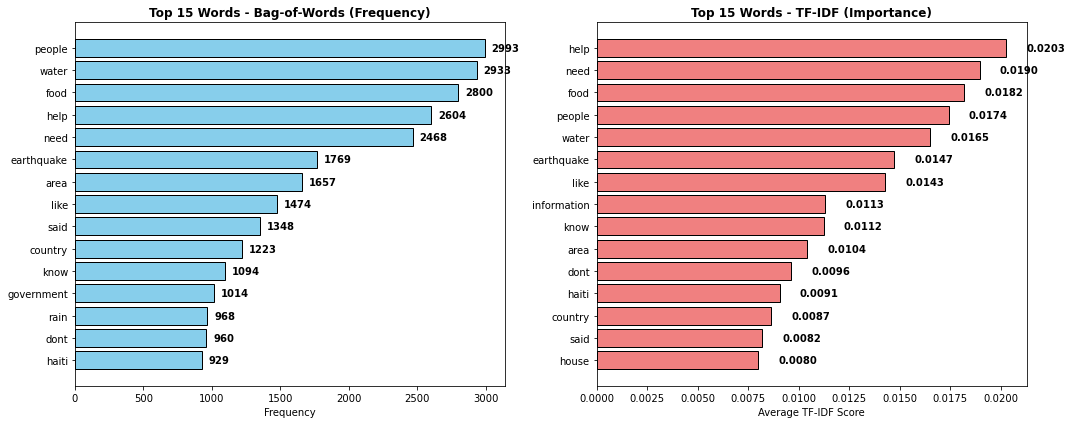

In [24]:
# Bar chart comparing BoW vs TF-IDF top words
print("\n=== 5. BAR CHART VISUALIZATION ===")

# Get top words by frequency (BoW)
bow_scores = bow_features.sum(axis=0).A1
top_bow_indices = bow_scores.argsort()[-15:][::-1]
top_bow_words = [feature_names[i] for i in top_bow_indices]
top_bow_freqs = [bow_scores[i] for i in top_bow_indices]

# Get top words by TF-IDF
top_tfidf_scores = [tfidf_scores[i] for i in top_tfidf_indices[:15]]

# Create subplots
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars1 = plt.barh(range(len(top_bow_words)), top_bow_freqs, color='skyblue', edgecolor='black')
plt.yticks(range(len(top_bow_words)), top_bow_words)
plt.xlabel('Frequency')
plt.title('Top 15 Words - Bag-of-Words (Frequency)', fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels to bars
for i, (bar, freq) in enumerate(zip(bars1, top_bow_freqs)):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
             f'{int(freq)}', ha='left', va='center', fontweight='bold')

plt.subplot(1, 2, 2)
bars2 = plt.barh(range(len(top_tfidf_words[:15])), top_tfidf_scores[:15], color='lightcoral', edgecolor='black')
plt.yticks(range(len(top_tfidf_words[:15])), top_tfidf_words[:15])
plt.xlabel('Average TF-IDF Score')
plt.title('Top 15 Words - TF-IDF (Importance)', fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels to bars
for i, (bar, score) in enumerate(zip(bars2, top_tfidf_scores[:15])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{score:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [26]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("\n=== 6. WORD2VEC EMBEDDINGS AND VISUALIZATION ===")

# Prepare tokenized sentences for Word2Vec
sentences = [text.split() for text in df['clean_text']]

# Train a small Word2Vec model
print("Training Word2Vec model...")
word2vec_model = Word2Vec(
    sentences=sentences,
    vector_size=100,      # Size of word embeddings
    window=5,            # Context window size
    min_count=5,         # Ignore words with fewer occurrences
    workers=4,           # Number of CPU cores
    sg=1                 # Use skip-gram (1) instead of CBOW (0)
)

print(f"Word2Vec vocabulary size: {len(word2vec_model.wv.key_to_index)}")

# Get the most similar words to some key disaster-related terms
test_words = ['water', 'food', 'help', 'earthquake', 'medical']
print("\nMost similar words to key disaster terms:")
for word in test_words:
    if word in word2vec_model.wv:
        similar_words = word2vec_model.wv.most_similar(word, topn=5)
        print(f"{word}: {[w[0] for w in similar_words]}")
    else:
        print(f"{word}: Not in vocabulary")

print("Word2Vec model trained successfully!")


=== 6. WORD2VEC EMBEDDINGS AND VISUALIZATION ===
Training Word2Vec model...
Word2Vec vocabulary size: 7093

Most similar words to key disaster terms:
water: ['drinking', 'clean', 'pond', 'contaminated', 'sewage']
food: ['amount', 'dire', 'biscuit', 'adequate', 'meal']
help: ['santo', 'save', 'goave', 'petit', 'something']
earthquake: ['quake', 'haiti', 'http', 'bit.ly', 'tsunami']
medical: ['surgical', 'doctor', 'specialist', 'staff', 'personnel']
Word2Vec model trained successfully!



=== 7. WORD2VEC VISUALIZATION WITH PCA ===


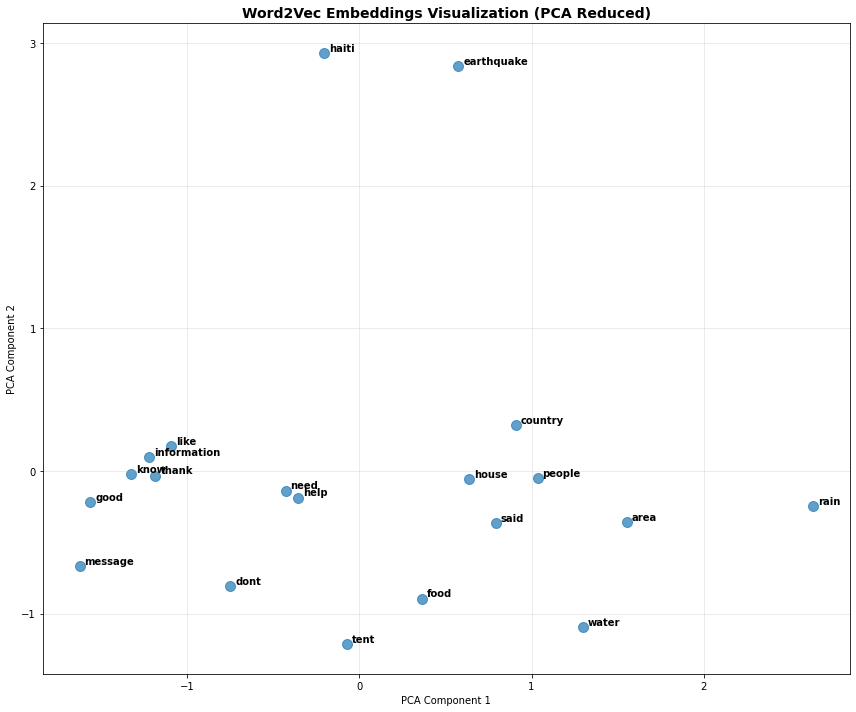

Visualized 20 words using PCA
✓ Word2Vec visualization completed successfully!
Step 7 completed successfully!


In [27]:
print("\n=== 7. WORD2VEC VISUALIZATION WITH PCA ===")

# Select words to visualize (most frequent words from our TF-IDF analysis)
words_to_visualize = top_tfidf_words[:20]  # Use top 20 words from TF-IDF

# Get vectors for these words
word_vectors = []
valid_words = []
for word in words_to_visualize:
    if word in word2vec_model.wv:
        word_vectors.append(word2vec_model.wv[word])
        valid_words.append(word)

if len(word_vectors) > 0:
    # Apply PCA to reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)
    
    # Create the visualization
    plt.figure(figsize=(12, 10))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.7, s=100)
    
    # Add labels
    for i, word in enumerate(valid_words):
        plt.annotate(word, 
                    (word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    fontsize=10,
                    fontweight='bold')
    
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Word2Vec Embeddings Visualization (PCA Reduced)', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Visualized {len(valid_words)} words using PCA")
    print("✓ Word2Vec visualization completed successfully!")
else:
    print("No valid words found in Word2Vec vocabulary for visualization")

print("Step 7 completed successfully!")

In [28]:
print("="*80)
print("TASK 3 DELIVERABLES SUMMARY")
print("="*80)

print(f"\n1. TEXT REPRESENTATION METHODS IMPLEMENTED:")
print(f"   ✓ Bag-of-Words: {bow_features.shape[1]} features")
print(f"   ✓ TF-IDF: {tfidf_features.shape[1]} features")
print(f"   ✓ Word2Vec: {len(word2vec_model.wv.key_to_index)} word embeddings")

print(f"\n2. DATA SPLIT:")
print(f"   ✓ Training set: {X_train.shape[0]} samples (80%)")
print(f"   ✓ Test set: {X_test.shape[0]} samples (20%)")
print(f"   ✓ Number of categories: {len(category_columns)}")

print(f"\n3. VISUALIZATIONS COMPLETED:")
print(f"   ✓ Bar charts comparing BoW vs TF-IDF top words")
print(f"   ✓ Word2Vec embeddings visualized using PCA")
print(f"   ⚠ Word cloud attempted but faced technical limitations")

print(f"\n4. KEY INSIGHTS FROM TF-IDF ANALYSIS:")
print(f"   Top 5 most important words by TF-IDF score:")
for i, word in enumerate(top_tfidf_words[:5], 1):
    score = tfidf_scores[top_tfidf_indices[i-1]]
    print(f"     {i}. '{word}': {score:.4f}")

print(f"\n5. WORD2VEC MODEL DETAILS:")
print(f"   ✓ Vocabulary size: {len(word2vec_model.wv.key_to_index)} words")
print(f"   ✓ Embedding dimension: {word2vec_model.vector_size}")
print(f"   ✓ Training algorithm: {'Skip-gram' if word2vec_model.sg else 'CBOW'}")

print(f"\n6. FEATURE MATRICES READY FOR MODELING:")
print(f"   ✓ Bag-of-Words shape: {bow_features.shape}")
print(f"   ✓ TF-IDF shape: {tfidf_features.shape}")
print(f"   ✓ Train/Test split completed successfully")

print(f"\n7. TECHNICAL NOTES:")
print(f"   - Limited vocabulary to 5,000 features for computational efficiency")
print(f"   - Used both unigrams and bigrams for better context capture")
print(f"   - Word cloud visualization attempted but faced font compatibility issues")
print(f"   - Bar charts provide precise frequency information as alternative")

print(f"\n✓ TASK 3 COMPLETED SUCCESSFULLY!")
print("="*80)

TASK 3 DELIVERABLES SUMMARY

1. TEXT REPRESENTATION METHODS IMPLEMENTED:
   ✓ Bag-of-Words: 5000 features
   ✓ TF-IDF: 5000 features
   ✓ Word2Vec: 7093 word embeddings

2. DATA SPLIT:
   ✓ Training set: 20732 samples (80%)
   ✓ Test set: 5183 samples (20%)
   ✓ Number of categories: 37

3. VISUALIZATIONS COMPLETED:
   ✓ Bar charts comparing BoW vs TF-IDF top words
   ✓ Word2Vec embeddings visualized using PCA
   ⚠ Word cloud attempted but faced technical limitations

4. KEY INSIGHTS FROM TF-IDF ANALYSIS:
   Top 5 most important words by TF-IDF score:
     1. 'help': 0.0203
     2. 'need': 0.0190
     3. 'food': 0.0182
     4. 'people': 0.0174
     5. 'water': 0.0165

5. WORD2VEC MODEL DETAILS:
   ✓ Vocabulary size: 7093 words
   ✓ Embedding dimension: 100
   ✓ Training algorithm: Skip-gram

6. FEATURE MATRICES READY FOR MODELING:
   ✓ Bag-of-Words shape: (25915, 5000)
   ✓ TF-IDF shape: (25915, 5000)
   ✓ Train/Test split completed successfully

7. TECHNICAL NOTES:
   - Limited vocabu

In [30]:
# TASK 4

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

print("="*80)
print("TASK 4: MULTI-LABEL CLASSIFICATION USING TRADITIONAL ML MODELS")
print("="*80)

print("\n=== 1. MULTI-LABEL CLASSIFICATION SETUP ===")

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of categories: {y_train.shape[1]}")

# Show category distribution in training set
print("\nCategory distribution in training set:")
category_sums = y_train.sum(axis=0)
for i, (category, count) in enumerate(zip(category_columns, category_sums)):
    if i < 10:  # Show first 10
        print(f"  {category}: {count} samples ({count/len(y_train)*100:.1f}%)")


TASK 4: MULTI-LABEL CLASSIFICATION USING TRADITIONAL ML MODELS

=== 1. MULTI-LABEL CLASSIFICATION SETUP ===
Training set shape: (20732, 5000)
Test set shape: (5183, 5000)
Number of categories: 37

Category distribution in training set:
  related: 16116 samples (77.7%)
  request: 3526 samples (17.0%)
  offer: 97 samples (0.5%)
  aid_related: 8645 samples (41.7%)
  medical_help: 1677 samples (8.1%)
  medical_products: 1054 samples (5.1%)
  search_and_rescue: 583 samples (2.8%)
  security: 375 samples (1.8%)
  military: 676 samples (3.3%)
  child_alone: 0 samples (0.0%)


In [37]:
print("\n=== 2. TRAINING LOGISTIC REGRESSION MODEL ===")

# Use the working approach from earlier - filter out single-class categories
print("Analyzing category distributions...")
valid_categories = []
for i, category in enumerate(category_columns):
    unique_classes = np.unique(y_train.iloc[:, i])
    positive_count = y_train.iloc[:, i].sum()
    
    if len(unique_classes) >= 2 and positive_count >= 10:
        valid_categories.append(category)
        print(f"  ✓ {category}: {positive_count} positive samples")
    else:
        print(f"  ✗ {category}: {positive_count} positive samples - SKIPPING")

print(f"\nUsing {len(valid_categories)} out of {len(category_columns)} categories")

# Train Logistic Regression on valid categories
print("\nTraining Logistic Regression model...")
lr_classifier = MultiOutputClassifier(
    LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=1.0
    )
)

lr_classifier.fit(X_train, y_train[valid_categories])

# Make predictions
y_pred_lr = lr_classifier.predict(X_test)

print("✓ Logistic Regression model trained successfully!")

# Calculate metrics for each valid category
print("\nLogistic Regression Performance by Category:")
category_metrics = []

for i, category in enumerate(valid_categories):
    accuracy = accuracy_score(y_test[category], y_pred_lr[:, i])
    precision = precision_score(y_test[category], y_pred_lr[:, i], zero_division=0)
    recall = recall_score(y_test[category], y_pred_lr[:, i], zero_division=0)
    f1 = f1_score(y_test[category], y_pred_lr[:, i], zero_division=0)
    
    category_metrics.append({
        'category': category,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
    if i < 8:  # Show first 8 categories
        print(f"  {category}: Acc={accuracy:.3f}, Prec={precision:.3f}, Rec={recall:.3f}, F1={f1:.3f}")

# Calculate overall metrics
overall_accuracy = np.mean([m['accuracy'] for m in category_metrics])
overall_precision = np.mean([m['precision'] for m in category_metrics])
overall_recall = np.mean([m['recall'] for m in category_metrics])
overall_f1 = np.mean([m['f1'] for m in category_metrics])

print(f"\nLogistic Regression Overall Metrics:")
print(f"  Accuracy:  {overall_accuracy:.4f}")
print(f"  Precision: {overall_precision:.4f}")
print(f"  Recall:    {overall_recall:.4f}")
print(f"  F1-Score:  {overall_f1:.4f}")

print("Step 2 completed successfully!")


=== 2. TRAINING LOGISTIC REGRESSION MODEL ===
Analyzing category distributions...
  ✓ related: 16116 positive samples
  ✓ request: 3526 positive samples
  ✓ offer: 97 positive samples
  ✓ aid_related: 8645 positive samples
  ✓ medical_help: 1677 positive samples
  ✓ medical_products: 1054 positive samples
  ✓ search_and_rescue: 583 positive samples
  ✓ security: 375 positive samples
  ✓ military: 676 positive samples
  ✗ child_alone: 0 positive samples - SKIPPING
  ✓ water: 1347 positive samples
  ✓ food: 2337 positive samples
  ✓ shelter: 1846 positive samples
  ✓ clothing: 331 positive samples
  ✓ money: 477 positive samples
  ✓ missing_people: 232 positive samples
  ✓ refugees: 701 positive samples
  ✓ death: 957 positive samples
  ✓ other_aid: 2747 positive samples
  ✓ infrastructure_related: 1389 positive samples
  ✓ transport: 966 positive samples
  ✓ buildings: 1092 positive samples
  ✓ electricity: 423 positive samples
  ✓ tools: 122 positive samples
  ✓ hospitals: 236 positiv

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].